# TensorBird execute saved model

The model has been train in [this notebook](https://colab.research.google.com/drive/1ZVIR-rOjYBwsmaxewlTT9alLnwLdFfy9#scrollTo=s4dIb12FKR4i)

In [3]:
import os
import pickle
import glob
from PIL import Image
import numpy as np

import tensorflow as tf

print(tf.version.VERSION)

2.4.1


In [4]:
model = tf.keras.models.load_model('../models/saved_model.pbtxt')

In [22]:
CLASS_NAMES = pickle.loads(open('../models/saved_model.pbtxt/labels.pickle', "rb").read())
CLASS_NAMES

array(['fricoe', 'prumod', 'pasdom', 'felcat', 'erirub', 'caycae',
       'parmaj'], dtype='<U6')

In [ ]:
import pandas as pd
data = {'file_name': [], 'date': [], 'predicted_species': [], 'probability': []}
i = 0
image_paths = glob.glob('/home/ortion/Documents/PiCameraTrap/captures/raw/*/*.jpg')

for image_path in image_paths:
  i+=1
  im = Image.open(image_path)
  im = im.resize((100, 75))
  im = np.array(im)
  im = im / 255
  predictions = model.predict(im[None, :, :])
  idx = np.argmax(predictions)
  prediction = CLASS_NAMES[idx]
  data['file_name'].append(os.path.basename(image_path))
  data['date'].append(os.path.basename(image_path).split('-')[1])
  data['predicted_species'].append(prediction)
  data['probability'].append(predictions[0][idx])
  print(f'Treating {os.path.basename(image_path)} ({prediction}-{predictions[0][idx]})    {i}/{len(image_paths)}.')


df = pd.DataFrame(data)
df.to_csv("../data/analyses/guesses.csv")

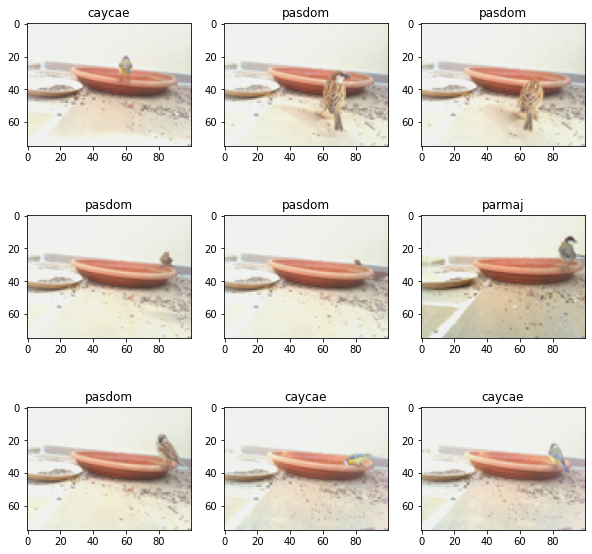

In [25]:
import matplotlib.pyplot as plt
import random
image_paths = glob.glob('/home/ortion/Documents/PiCameraTrap/captures/raw/2021-03-03/*.jpg')
fig = plt.figure(figsize=(10, 10))
rows = 3
cols = 3
axes=[]
for a in range(rows*cols):
    im = Image.open(random.choice(image_paths))
    im = im.resize((100, 75))
    im = np.array(im)
    im = im / 255
    predictions = model.predict(im[None, :, :])
    idx = np.argmax(predictions)
    prediction = CLASS_NAMES[idx]
    axes.append(fig.add_subplot(rows, cols, a+1))
    axes[-1].set_title(prediction)
    axes[-1].imshow(im)